In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load dataset
dataset = pd.read_csv('lstm_nox.csv')
dataset = dataset.fillna(dataset.mean())
data = dataset.values
data = data.astype('float32')

In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [5]:
# Split data into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [6]:
# Create function to create LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [7]:
# Reshape input data to be 3-dimensional
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))

In [8]:
# Create and fit the LSTM model
model = create_model()
model.fit(X_train, train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1039/1039 - 3s - loss: 0.0058 - 3s/epoch - 3ms/step
Epoch 2/100
1039/1039 - 1s - loss: 2.5430e-04 - 1s/epoch - 1ms/step
Epoch 3/100
1039/1039 - 1s - loss: 1.7084e-04 - 1s/epoch - 1ms/step
Epoch 4/100
1039/1039 - 1s - loss: 1.5255e-04 - 1s/epoch - 1ms/step
Epoch 5/100
1039/1039 - 1s - loss: 1.3426e-04 - 1s/epoch - 1ms/step
Epoch 6/100
1039/1039 - 1s - loss: 1.7323e-04 - 1s/epoch - 1ms/step
Epoch 7/100
1039/1039 - 1s - loss: 1.1916e-04 - 1s/epoch - 1ms/step
Epoch 8/100
1039/1039 - 1s - loss: 1.7594e-04 - 1s/epoch - 1ms/step
Epoch 9/100
1039/1039 - 1s - loss: 1.6716e-04 - 1s/epoch - 1ms/step
Epoch 10/100
1039/1039 - 1s - loss: 1.0351e-04 - 1s/epoch - 1ms/step
Epoch 11/100
1039/1039 - 1s - loss: 1.1376e-04 - 1s/epoch - 1ms/step
Epoch 12/100
1039/1039 - 1s - loss: 1.0264e-04 - 1s/epoch - 1ms/step
Epoch 13/100
1039/1039 - 1s - loss: 1.1698e-04 - 1s/epoch - 1ms/step
Epoch 14/100
1039/1039 - 1s - loss: 9.7355e-05 - 1s/epoch - 1ms/step
Epoch 15/100
1039/1039 - 1s - loss: 1.1967e-04 

In [9]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [10]:
train_predict = scaler.inverse_transform(train_predict)
train = scaler.inverse_transform(train)
test_predict = scaler.inverse_transform(test_predict)
test = scaler.inverse_transform(test)

In [11]:
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
test_rmse = np.sqrt(mean_squared_error(test, test_predict))
print('R2 Score_train:', r2_score(train, train_predict))
print('R2 Score_test:', r2_score(test, test_predict))

print('Train RMSE: %.2f' % train_rmse)
print('Test RMSE: %.2f' % test_rmse)

R2 Score_train: 0.9992779213043638
R2 Score_test: 0.9990380390484108
Train RMSE: 1.22
Test RMSE: 1.03


In [12]:
df=pd.DataFrame({'Actual':train.tolist(),'Predicted from lstm':train_predict.tolist()})
df.to_excel('lstm_NOx.xlsx')
df

,Actual,Predicted from lstm
0,[66.75],[67.6581039428711]
1,[78.4000015258789],[79.26636505126953]
2,[81.9800033569336],[82.83638000488281]
3,[78.18000030517578],[79.04701232910156]
4,[77.37999725341797],[78.24942779541016]
...,...,...
1034,[109.4100112915039],[110.2196273803711]
1035,[130.97000122070312],[131.75729370117188]
1036,[209.1300048828125],[209.5487060546875]
1037,[146.11000061035156],[146.87486267089844]


In [13]:
df=pd.DataFrame({'Actual':test.tolist(),'Predicted from lstm':test_predict.tolist()})
df.to_excel('lstm_NOx_test.xlsx')
df

,Actual,Predicted from lstm
0,[55.34000015258789],[56.305572509765625]
1,[60.04999923706055],[60.9896240234375]
2,[94.4800033569336],[95.30977630615234]
3,[97.12000274658203],[97.94548797607422]
4,[180.9600067138672],[181.6028289794922]
...,...,...
507,[37.16999816894531],[38.26997375488281]
508,[48.32541275024414],[49.33604431152344]
509,[48.32541275024414],[49.33604431152344]
510,[48.32541275024414],[49.33604431152344]


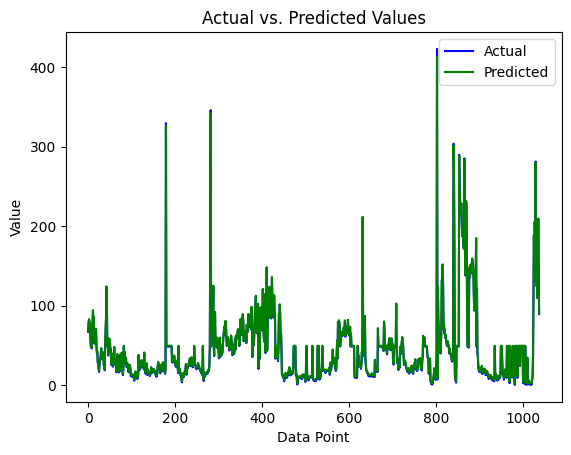

In [14]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(train))

# plot actual values as a blue line
plt.plot(x_values, train, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, train_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

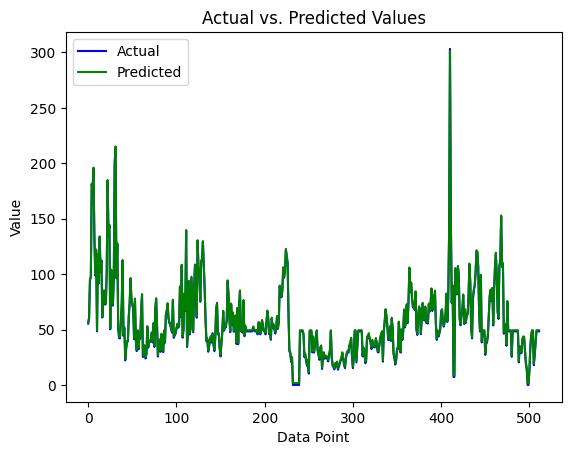

In [15]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(test))

# plot actual values as a blue line
plt.plot(x_values, test, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, test_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()